Feature 1: This is a data set I created for a fictional Fruit and Veggie sales company. They want to know their top most profitable customers and their most profitable regions. Their data is spread out between three files. In the below code block the three files are read into Python, the excel file is reformated to .csv and they are merged into one master file. This file is called 'comp_data.csv' and is saved in the 'final_files' folder.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date

cu_data = pd.read_csv('final_files/cust_data.csv')
or_data = pd.read_csv('final_files/order_data.csv')
prd_data = pd.read_excel('final_files/prod_data.xlsx')

cust_order_data = pd.merge(cu_data, or_data, on='customer_id', how='outer')

comp_data = pd.merge(prd_data, cust_order_data, on='product_id', how='outer')

comp_data.to_csv('final_files/comp_data.csv', sep=',', index=False)


#Use the below code if you want to review the combine file. 

#comp_data_set = pd.read_csv('final_files/comp_data.csv')
#print(comp_data_set.to_string())



Feature 2: Prior to analyzng the data it needs to be cleaned. In the below code block unwanted columns are removed, cells with NaN values are updated, and data types are corrected so figures can be correctly calulated in the later analysis.

In [2]:
col_drop = pd.read_csv('final_files/comp_data.csv')
col_drop1 = pd.DataFrame(col_drop)
col_drop2 = col_drop1.drop(['product_type', 'years_served'], axis=1, inplace=False)
col_org = col_drop2.sort_values(['order_date', 'order_id'], inplace=False)

col_nan = col_org.fillna({'product_id':'blank','product_name':'blank', 
                          'unit_price':'0.00', 'unit_cost':'0.00', 'order_id':'blank', 'quantity':'0.0', 
                          'order_date':'0/00/0000', 'order_status':'blank'}, inplace=False)

col_type = col_nan.astype({'unit_price':'float', 'unit_cost':'float', 'customer_id':'object', 'quantity':'float'})
print(col_type.to_string())

    product_id        product_name  unit_price  unit_cost season customer_id customer_name_first customer_name_last      region order_id  quantity order_date order_status
0        p0001             Bananas       0.800       0.50     s1        1005               David              Jones  South West     x001       5.0   1/1/2023     Complete
122      p0023          Nectarines       1.280       0.80     s3        1005               David              Jones  South West     x001       5.0   1/1/2023     Complete
224      p0040        Aji Amarillo       1.120       0.70     s4        1005               David              Jones  South West     x001       8.0   1/1/2023     Complete
28       p0004              Grapes       1.280       0.80     s3        1095              Eugene              Patel  South West     x002       6.0   1/1/2023     Complete
169      p0030           Eggplants       0.880       0.55     s4        1095              Eugene              Patel  South West     x002       6.

Feature 3: The customer wants to know the top 15 customers by the profit and which region is most profitable. The coding below creates a new column called 'Profits' based off of the Unit Price, Unit Cost, and Quantity sold. The sales are then grouped by each customer and the print show spreadsheet format top 15 customers. The second block of coding show the regions listed in order of the most profitable to least profitable.

In [63]:
#Code to show the top 15 most profitable customers.
col_type['profit'] = ((col_type['unit_price'] - col_type['unit_cost']) * col_type['quantity'])
col_group = col_type.groupby(['customer_id'], sort=True)['profit'].sum().reset_index()
col_group = col_group.sort_values(by = ['profit'], ascending=[False]).head(15)
top_cust = pd.merge(col_group, cu_data, on='customer_id', how='left')

#Code to Show the regions by most profitable.
col_type['profit'] = ((col_type['unit_price'] - col_type['unit_cost']) * col_type['quantity'])
col_group = col_type.groupby(['region'], sort=True)['profit'].sum().reset_index()
col_group = col_group.sort_values(by = ['profit'], ascending=[False]).head(9)

print(top_cust.to_string())
print(col_group.to_string())


    customer_id   profit customer_name_first customer_name_last      region  years_served
0          1018  145.560                Paul              Moore     Central             4
1          1047  135.618             Raymond           Campbell  North West            19
2          1178  135.360                Jean                Cox        West             8
3          1101  116.460                Mary              Smith  North West            19
4          1122  115.830              Amanda              Perez  South West             6
5          1086  115.080              Willie             Bennet  South West             1
6          1016  106.164              Donald             Thomas        West             8
7          1006  104.340             William             Garcia       North             4
8          1156   96.480            Virginia             Parker       South             5
9          1071   93.588                Sean           Peterson        East             6
10        

Feature 4: The Customer not only wanted the data available in text formatting they also wanted to see a graphical showing of the data. Below is the coding that show teh top customers and regions in graphs.

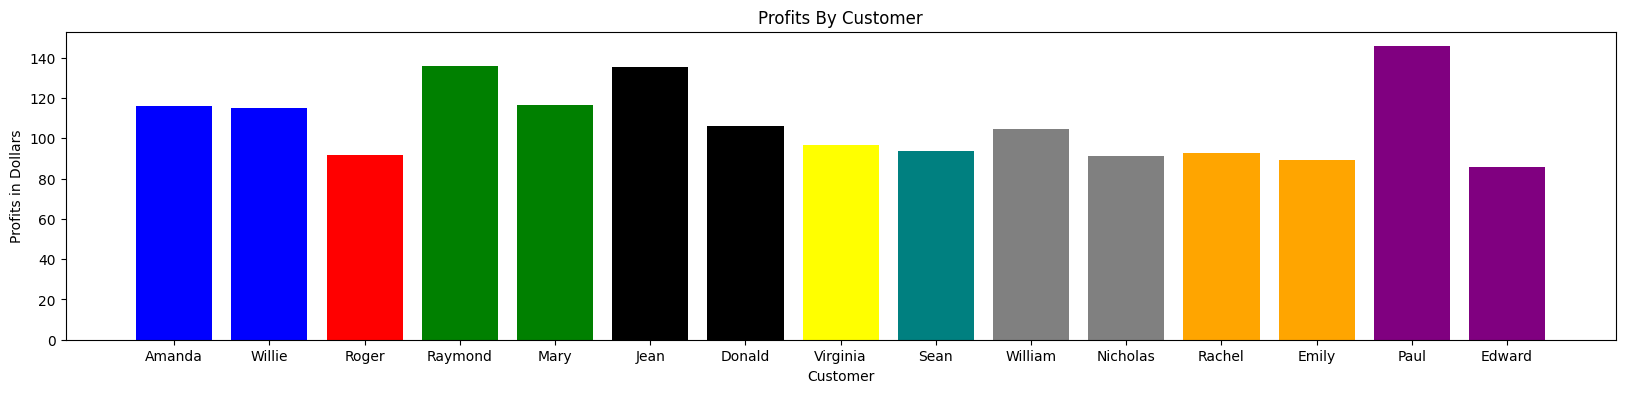

In [62]:


#This code block is for the top 15 customers.

plt.figure(figsize=(20,4))

mask1 = top_cust['region'] == 'South West'
mask2 = top_cust['region'] == 'South East'
mask3 = top_cust['region'] == 'North West'
mask4 = top_cust['region'] == 'West'
mask5 = top_cust['region'] == 'South'
mask6 = top_cust['region'] == 'East'
mask7 = top_cust['region'] == 'North'
mask8 = top_cust['region'] == 'North East'
mask9 = top_cust['region'] == 'Central'

plt.bar((top_cust['customer_name_first'])[mask1], (top_cust['profit'])[mask1], color = 'blue')
plt.bar((top_cust['customer_name_first'])[mask2], (top_cust['profit'])[mask2], color = 'red')
plt.bar((top_cust['customer_name_first'])[mask3], (top_cust['profit'])[mask3], color = 'green')
plt.bar((top_cust['customer_name_first'])[mask4], (top_cust['profit'])[mask4], color = 'black')
plt.bar((top_cust['customer_name_first'])[mask5], (top_cust['profit'])[mask5], color = 'yellow')
plt.bar((top_cust['customer_name_first'])[mask6], (top_cust['profit'])[mask6], color = 'teal')
plt.bar((top_cust['customer_name_first'])[mask7], (top_cust['profit'])[mask7], color = 'grey')
plt.bar((top_cust['customer_name_first'])[mask8], (top_cust['profit'])[mask8], color = 'orange')
plt.bar((top_cust['customer_name_first'])[mask9], (top_cust['profit'])[mask9], color = 'purple')

plt.title('Profits By Customer')
plt.xlabel('Customer')
plt.ylabel('Profits in Dollars')

plt.show()


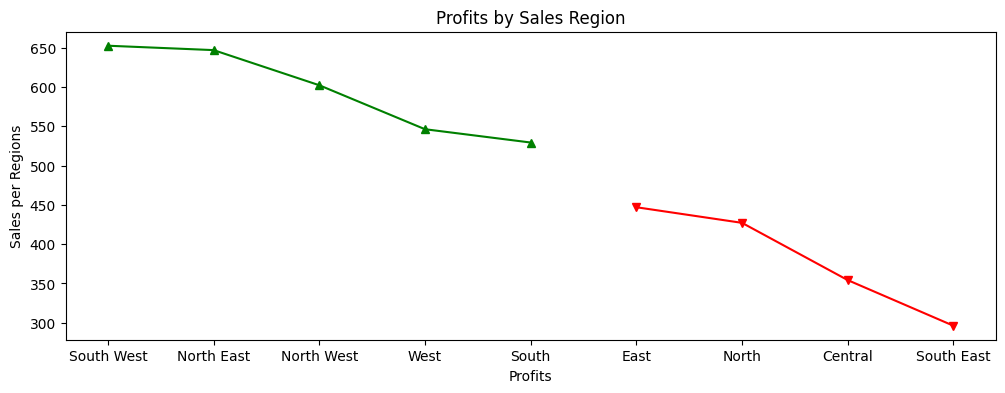

In [65]:
plt.figure(figsize=(12,4))

mask1 = col_group['profit'] > 500
mask2 = col_group['profit'] < 500

plt.plot((col_group['region'])[mask1], (col_group['profit'])[mask1], marker = '^', color = 'green')
plt.plot((col_group['region'])[mask2], (col_group['profit'])[mask2], marker = 'v', color = 'red')

plt.title('Profits by Sales Region')
plt.xlabel('Profits')
plt.ylabel('Sales per Regions')

plt.show()